**<p style='text-align: right;'>Ver. 2.0.1</p>**

# Introductory Applied Machine Learning (IAML) Coursework - Semester 2, 2024-25

### Author: Brian Qian, Fengxiang He

## Important Instructions

#### It is important that you follow the instructions below carefully for things to work properly.

You need to set up and activate your environment as you would do for your labs, see Learn section on Labs.  **You will need to use Noteable to create the files you will submit (the Jupyter (IPynthon) Notebook and the PDF)**.  Do **NOT** create the PDF in some other way, we will not be able to mark it.  If you want to develop your answers in your own environment, you should make sure you are using the same packages we are using, by running the cell which does imports below.

Read the instructions in this notebook carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the required code/markdown cell.

- We will use the IAML Learn page for any announcements, updates, and FAQs on this assignment. Please ***visit the page frequently*** to find the latest information/changes.
- Data files that you will be using are included in the coursework zip file that you have downloaded from the Learn assignment page for this coursework.
- Some of the topics in this coursework are covered in weeks 7 and 8 of the course. Focus first on questions on topics that you have covered already, and come back to the other questions as the lectures progress.
- Keep your answers brief and concise.
- Make sure to show all your code/working.
- All the figures you present should have axis labels, titles, and grid lines unless specified explicitly. If you think grid lines spoiling readability, you can adjust the line width and/or line style. Figures should not be too small to read.
- Write readable code. While we do not expect you to follow PEP8 to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. Do use inline comments when doing something non-standard.
- When asked to present numerical values, make sure to represent real numbers in the appropriate precision corresponding to your answer.
- When you use libraries specified in this coursework, you should use the default parameters unless specified explicitly.
- The criteria on which you will be judged include the quality of the textual answers and/or any plots asked for. For higher marks, when asked you need to give good and concise discussions based on experiments and theories using your own words.

- You will see <html>\\pagebreak</html> at the start of each subquestion.  ***Do not remove these, if you do we will not be able to mark your coursework.***

#### Good Scholarly Practice
Please remember the University requirement regarding all assessed work for credit. Details about this can be found at:
http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct

Specifically, this assignment should be your own individual work. We will employ tools for detecting misconduct.

Moreover, please note that Piazza is NOT a forum for discussing the solutions of the assignment. You may ask private questions. You can use the office hours to ask questions.

### SUBMISSION Mechanics
This assignment will account for 30% of your final mark. We ask you to submit answers to all questions.

You will submit (1) a PDF of your Notebook and (2) the Notebook itself via Gradescope.  Your grade will be based on the PDF, we will only use the Notebook if we need to see details.  **You must use the following procedure to create the materials to submit**.

1. Make sure your Notebook, the helper file, and the datasets are in Noteable and will run.  If you developed your answers in Noteable, this is already done.

2. Select **Kernel->Restart & Run All** to create a clean copy of your submission, this will run the cells in order from top to bottom.  This may take a while (a few hours) to complete, ensure that all the output and plots have complete before you proceed.

3. Select **File->Download as->PDF via LaTeX (.pdf)** and wait for the PDF to be created and downloaded.

4. Select **File->Download as->Notebook (.ipynb)**

5. You now should have in your download folder the pdf and the notebook.  Rename them sNNNNNNN.pdf and sNNNNNNN.ipynb, where sNNNNNNN is your matriculation number (student number).

**Details on submission instructions will be announced and documented on Learn before the deadline**.

The submission deadline for this assignment is **Tuesday 1st April 2025 at 16:00 UK time (UTC)**.  Don't leave it to the last minute!


#### IMPORTS
Execute the cell below to import all packages you will be using for this assignment.  If you are not using Noteable, make sure the python and package version numbers reported match the python and package numbers, which can be checked by running the following cell. The Python version does not need to be the same, but it should be $3.9.p$, where $p \ge 12$.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.patches as mpatches
import copy

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from pandas.plotting import parallel_coordinates
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')
# You may add other libraries here or in your other cells as needed.

\pagebreak

# Question 1: Experiments with a UK housing price dataset

#### 43 marks out of 100 for this coursework

The "UK Property Price official data" dataset contains detailed records of property sales in England and Wales from January 1995 to the latest data from December 2024, sourced from the UK government's HM Land Registry. It provides extensive insights into the real estate market dynamics, including transaction prices, property types, and locations. This dataset is essential for analysing market trends, evaluating property investments, and researching regional economic conditions.

We have performed initial data cleaning, which removes all features involving missing values and other 9 features remain..

Data Link: https://www.kaggle.com/datasets/lorentzyeung/price-paid-data-202304/data?select=December+2024+data.csv

Loading data: Ensure that the dataset file "uk_housing_data.csv" is available in your environment and run the following code to load the dataset.

In [2]:
data_path = "./dataset/"
df_housing = pd.read_csv(data_path + 'uk_housing_data.csv')

# ========== Question 1.1 --- [3 marks] ==========

Visualise the data:

1. [Code] Divide the housing prices equally into three categories: Low, Medium, and High, and store it for each house in a new **price_cateogry** attribute in df_housing. This will be the feature of interest for data exploration and for classification in the rest of the Question 1. For features that are not in integer form, use sklearn's **LabelEncoder** to convert them into integers.
1. [Code] Use the **parallel_coordinates** function from pandas to visualise the **Encoded Features**: **'Property_Type'**, **'Old/New'**, **'Duration'**, **'PPDCategory_Type'**, **'Record_Status'**, and **'price_category'** in the dataset. Data points from different price categories should be coloured differently.

\pagebreak
## Your answers for Question 1.1

In [3]:
# Dividing the price column into three quantiles (Low, Medium, High)
df_housing['price_category'] = pd.qcut(df_housing['price'], q=3, labels=['Low', 'Medium', 'High'])

# Transforming the categorical columns into integers.
columns_to_encode = ['Property_Type', 'Old/New', 'Duration','Town/City','Country','PPDCategory_Type', 'Record_Status', 'price_category']

label_encoder = LabelEncoder()
for col in columns_to_encode:
    df_housing[col] = label_encoder.fit_transform(df_housing[col])

df_housing.head()

,price,Date_of_Transfer,Property_Type,Old/New,Duration,Town/City,Country,PPDCategory_Type,Record_Status,price_category
0,158995,2021-03-11 00:00,4,0,0,851,0,0,0,1
1,60000,2021-10-07 00:00,4,0,0,851,0,0,0,1
2,295000,2021-07-21 00:00,3,0,0,851,0,0,0,2
3,180995,2021-06-09 00:00,0,1,0,806,0,0,0,1
4,351000,2021-10-22 00:00,4,1,0,851,0,0,0,2


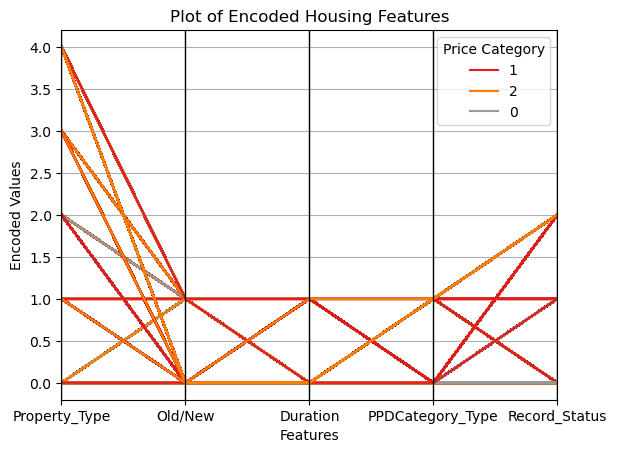

In [4]:
# Features to visualize
encoded_features = ['Property_Type', 'Old/New', 'Duration', 'PPDCategory_Type', 'Record_Status', 'price_category']

#Dataframe to store only the encoded features
df = df_housing[encoded_features]

# Plotting using parallel coordinates with different colors for each price_category
parallel_coordinates(df, class_column='price_category', colormap=plt.get_cmap("Set1"))
plt.title("Plot of Encoded Housing Features")
plt.xlabel("Features")
plt.ylabel("Encoded Values")
plt.grid(True)
plt.legend(title="Price Category")
plt.show()

# ========== Question 1.2 --- [5 marks] ==========

Apply K-means (with k=3) to cluster within each price category on the Housing dataset and ignore **Date_of_Transfer** attribute in the clustering process.

1. [Code] Apply sklearn's **KMeans** specifying **n_clusters=3** and **random_state=0** to the dataset, while all other parameters are set as default. Note that the two parameters should be set explicitly.
2. [Code] Use matplotlib's **pyplot** to plot the cluster centres based on features, **"Old/New"** and **"Property_Type"**, and colour the data points by different price categories.

\pagebreak
## Your answers for Question 1.2

In [5]:
#Removing column not required for clustering
features = df_housing.drop(columns=["Date_of_Transfer","price"])

#KMeans with k=3 and random_state=0
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features)

# Assigning cluster labels to the main dataframe
df_housing['Clusters'] = clusters

df_housing.head()

,price,Date_of_Transfer,Property_Type,Old/New,Duration,Town/City,Country,PPDCategory_Type,Record_Status,price_category,Clusters
0,158995,2021-03-11 00:00,4,0,0,851,0,0,0,1,1
1,60000,2021-10-07 00:00,4,0,0,851,0,0,0,1,1
2,295000,2021-07-21 00:00,3,0,0,851,0,0,0,2,1
3,180995,2021-06-09 00:00,0,1,0,806,0,0,0,1,1
4,351000,2021-10-22 00:00,4,1,0,851,0,0,0,2,1


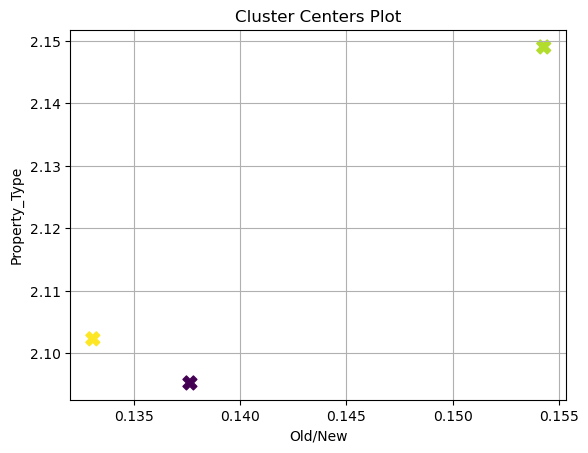

In [6]:
# Extracting the columns to plot
y = kmeans.cluster_centers_[:, 0]  #Property_Type
x = kmeans.cluster_centers_[:, 1]  #Old/New
z = kmeans.cluster_centers_[:, 7]  #price_category

# Scatter plot
plt.scatter(x, y, c=z, marker='X', s=100)
plt.xlabel("Old/New")
plt.ylabel("Property_Type")
plt.title("Cluster Centers Plot")
plt.grid(True)
plt.show()

\pagebreak

# ========== Question 1.3 --- [5 marks] ==========

Use Principal Component Analysis (PCA) to perform dimension reduction on the dataset.

1. [Code] Use sklearn's **PCA** to perform PCA on the **Encoded Features** specified in the Question 1.1. Initialize the PCA with parameters to extract up to **5** principal components. Fit the model to your dataset and then extract and show the **variance** of each **principal component**. 
2. [Code] Calculate the **cumulative explained variance ratio** $r_i$ for each principal component using the formula:
   $$ r_i = \frac{\sum_{j=1}^i \lambda_j}{\sum_{j=1}^D \lambda_j}, $$
   where $\lambda_j$ represents the variance explained by the $j$-th principal component and $D$ is the total number of dimensions in your dataset. Plot these ratios against the number of components used. This plot will provide a visual representation of how each additional principal component contributes to explaining the total variance of the dataset. It is important to determine the number of components necessary for a good balance between information retention and dimensionality reduction.

\pagebreak
## Your answers for Question 1.3

Principal Component 1: 0.2293 variance
Principal Component 2: 0.1820 variance
Principal Component 3: 0.1706 variance
Principal Component 4: 0.1603 variance
Principal Component 5: 0.1513 variance


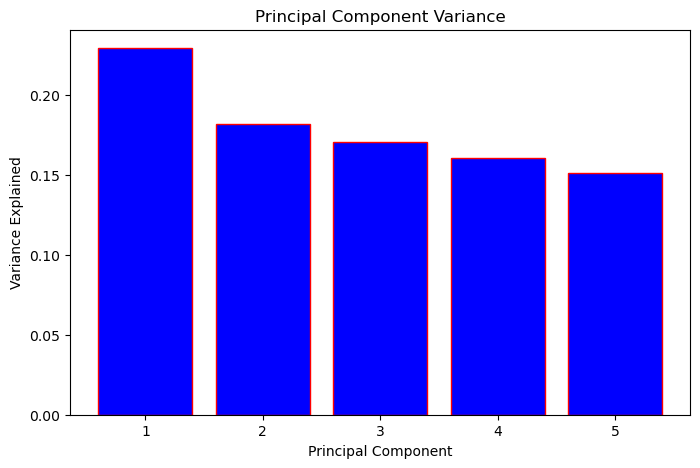

In [7]:
encoded_features = ["Property_Type", "Old/New", 
                    "Duration", "PPDCategory_Type", "Record_Status", "price_category"]

# Extracting only the encoded feature columns from the dataframe
X = df_housing[encoded_features]

# Features standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA application
pca = PCA(n_components=5)
pca.fit(X_scaled)

#Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f} variance")

plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), explained_variance, color="blue", edgecolor="red")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Principal Component Variance")
plt.xticks(range(1, 6))
plt.show()

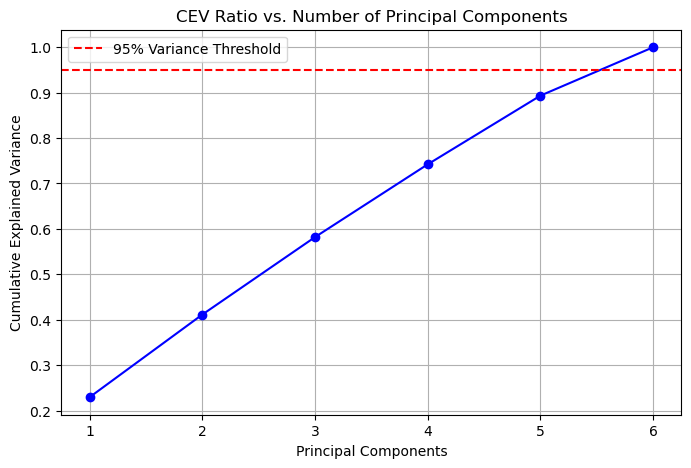

In [8]:
#PCA application to all components
pca = PCA(n_components=len(encoded_features))
pca.fit(X_scaled)

#Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Computing cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot for cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(encoded_features) + 1), cumulative_variance, marker='o', linestyle='-', color="blue")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("CEV Ratio vs. Number of Principal Components")
plt.xticks(range(1, len(encoded_features) + 1))
plt.legend()
plt.grid(True)
plt.show()

\pagebreak

# ========== Question 1.4 --- [6 marks] ==========

We now would like to know how the dataset **df_housing** distribute in a vector space to evaluate feature effectiveness and understand data patterns. To visualise distributions, we reduce the dimensionality of the data to **2** using PCA, and then plot the dimensionality-reduced data on a two-dimensional "plane" spanned by the first two principal components. Note that each instance in the dataset is now displayed as a single point on the plane.

1. [Code] Plot the **Encoded Features** on the two-dimensional PCA plane, where the data points from different price categories are coloured differently. Adjust the marker size to reduce the overlapping area.
2. [Text] Discuss the separation of the price categories and explain you findings considering these aspects such as: (1) The degree of overlap between different price categories. (2) Any visible clusters and what they may indicate about the dataset. (3) How well PCA as a dimensionality reduction technique managed to capture class-discriminative information. (4) Implications of the observed class distribution for machine learning tasks such as classification, etc.


\pagebreak
## Your answers for Question 1.4

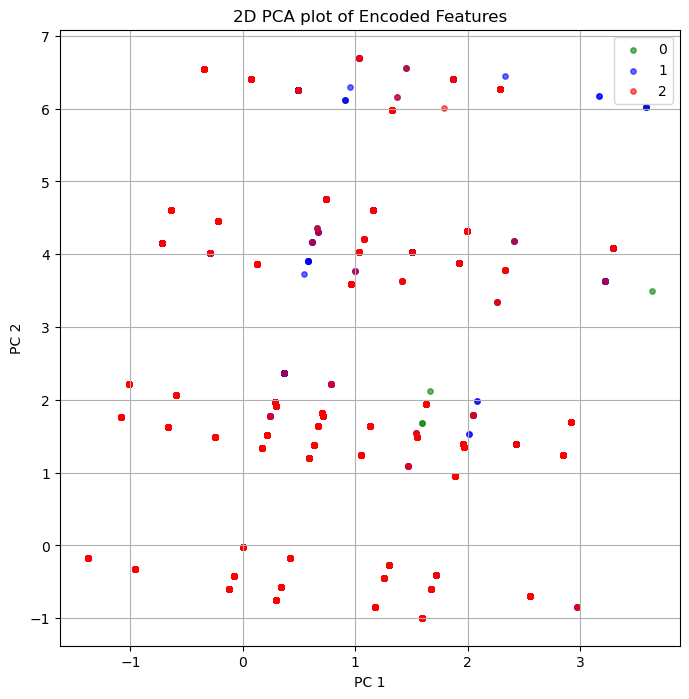

In [9]:
#Removed price category from the encoded features
encoded_features = ["Property_Type", "Old/New", "Duration", "PPDCategory_Type", "Record_Status"]

# Extracting only the encoded feature columns from the dataframe
X = df_housing[encoded_features]

# Features standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA application
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(pc, columns=["PC1", "PC2"])
df_pca["price_category"] = df_housing["price_category"]

colors = { 0: "green", 1: "blue", 2: "red"}
plt.figure(figsize=(8, 8))

# Plotting each category separately
for category, color in colors.items():
    subset = df_pca[df_pca["price_category"] == category]
    plt.scatter(subset["PC1"], subset["PC2"], label=category, 
                color=color, alpha=0.6, s=15)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("2D PCA plot of Encoded Features")
plt.legend()
plt.grid(True)
plt.show()

High-end houses appear to be more prominent on the plot and clustering together. 

There is minimal overlap between the various price categories, indicating significant differences among the price groups.

Since there is minimal overlap, the risk of misclassification is low, and classification models can effectively learn from and predict the data.

\pagebreak

# ========== Question 1.5 --- [12 marks] ==========

We will now apply classification to the dataset. Ensure that you split the dataset into a training set and a testing set with a ratio of 0.8 using sklearn's **train_test_split**, and set **random_state=0**. Remember to convert **'Date_of_Transfer'** into an integer timestamp by dividing it by $10^{11}$.
1. [Code] Use sklearn's **LogisticRegression** (with **random_state=0**) to classify the dataset based on these features: **Property_Type**, **Old/New**, **Duration**, **Record_Status**. Calculate and report the classification accuracy and confusion matrix for both the training set and the test set. Use sklearn's **ConfusionMatrixDisplay** to display the confusion matrix. Note that you may ignore any warning messages during training.
2. [Code] Use sklearn's **SVC** (with **random_state=0**, **kernel="rbf"**, **gamma=0.1**) to perform SVM classification on the dataset. Calculate and report the classification accuracy and confusion matrix for both the training set and the test set.
3. [Text] Discuss your findings based on the results obtained in steps 1 and 2. You may consider the following aspects: (1) analyse the classification accuracies of both models to determine which model perform better and hypothesize why this may be the case. (2) compare the confusion matrices of the two methods to discuss how each model handles false positives and false negatives. (3) evaluate any notable patterns in misclassification and what these may suggest about the dataset or the models' assumptions. (4) consider the implications of these results for practical applications such as real-world tasks or further model improvements.

Training Accuracy: 0.49
Testing Accuracy: 0.49


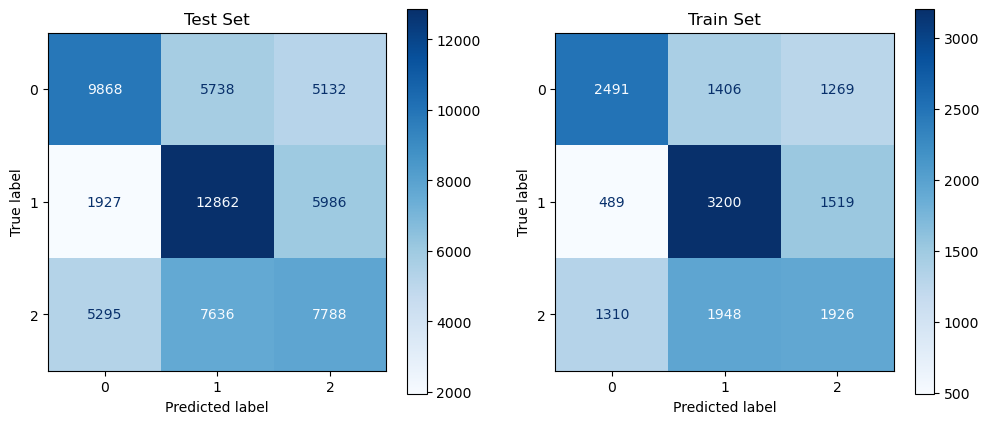

In [10]:
# Converting the date column into an integer
df_housing['Date_of_Transfer'] = pd.to_datetime(df_housing['Date_of_Transfer'])
df_housing['Date_of_Transfer'] = df_housing['Date_of_Transfer'].view('int64') // 10**9
df_housing['Date_of_Transfer'] = df_housing['Date_of_Transfer'] // 1011

#Features and Target selection
features = ["Property_Type", "Old/New", "Duration", "Record_Status"]
X = df_housing[features]
y = df_housing["price_category"] #Target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

#Fitting the model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

#Making predictions
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

#Checking for model accuracy
train_score = model.score(X_train,y_train).round(2)
test_score = model.score(X_test,y_test).round(2)

print(f"Training Accuracy: {train_score}")
print(f"Testing Accuracy: {test_score}")

#Confusion Matrix for testing & training set
cm_test = confusion_matrix(y_test,test_pred)
cm_train = confusion_matrix(y_train,train_pred)

# Displaying confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_test).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Test Set")
ConfusionMatrixDisplay(cm_train).plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Train Set")
plt.show()

Training Accuracy: 0.49
Testing Accuracy: 0.49


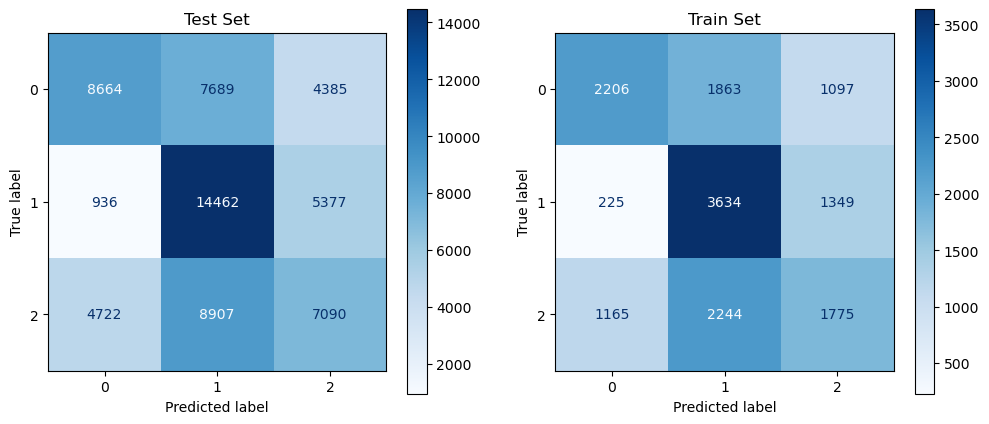

In [11]:
#Utilizing the split data from 1.5.1

#Fitting the model
model = SVC(random_state=0, kernel="rbf", gamma=0.1)
model.fit(X_train, y_train)

#Making predictions
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

#Checking for model accuracy
train_score = model.score(X_train,y_train).round(2)
test_score = model.score(X_test,y_test).round(2)

print(f"Training Accuracy: {train_score}")
print(f"Testing Accuracy: {test_score}")

#Confusion Matrix for testing & training set
cm_test = confusion_matrix(y_test,test_pred)
cm_train = confusion_matrix(y_train,train_pred)

# Displaying confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_test).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Test Set")
ConfusionMatrixDisplay(cm_train).plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Train Set")
plt.show()

1. Both models exhibit an identical accuracy rate of 49%.

2. There are hardly any significant differences in how the models handle false positives and false negatives. However, there is a substantial difference in how the models classify medium-priced houses. The Logistic Regression model categorizes more medium-priced houses as low compared to SVM.

3. From the comparison, it is evident that the Logistic Regression model has a higher number of false negatives, which may render it less suitable for real-world applications.

# ========== Question 1.6 --- [12 marks] ==========

In this mini-project, we will explore the use of gradient descent as an optimisation method for a machine learning model aimed at predicting housing price category. Our goal is to evaluate the impact of various learning rates on Logistic regression model performance through gradient descent optimisation.


1. [Code] Standardize the dataset using **`sklearn`'s `StandardScaler`** as gradient descent is sensitive to data scaling. Encode the prediction target `price_category` using **`sklearn`'s `OneHotEncoder`**, and ensure the dataset is transformed into a `np.array` format to facilitate model operations.
2. [Code] Install the **`mlrose`** package, which provides tools for optimizing machine learning models.Use **`mlrose`'s `LogisticRegression`** classifier to perform the classification. Experiment with different learning rates: `0.00001`, `0.0001`, `0.001`.
3. [Text] Discuss the impact of different learning rates on model accuracy and compare them with the results from Question 1.5. You may consider the following aspects: (1) analyse how the learning rate affects the accuracy of the logistic regression model with gradient descent optimisation. (2) discuss any trends or patterns observed in the accuracy as the learning rate changes. (3) compare these findings with the results from the initial logistic regression that did not involve adjustments to the learning rate.

**Note**: You can install the **`mlrose`** library by running the appropriate command in your Python environment.

- Install `mlrose` using pip:
  ```bash
  !pip install mlrose
  ```

- If you encounter issues related to `sklearn` or `scikit-learn`, install directly from the GitHub repository:
  ```bash
  !pip install git+https://github.com/Gabriel-p/mlrose@master
  ```


\pagebreak
## Your answers for Question 1.6

In [12]:
columns = ["Property_Type", "Old/New", "Duration", "PPDCategory_Type","Record_Status"]

X = df_housing[columns]
price = df_housing["price_category"] #Target

#OneHotEncoding on the price category column
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(df_housing[["price_category"]])

##Splitting & Standardizng the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#Had to use mlrose_hiive due to issues installing mlrose
import mlrose_hiive as mlrose

# Fitting the model
model = mlrose.LogisticRegression(learning_rate=0.00001)

# Training the model
model.fit(X_train_scaled, y_train)

#Making predictions
y_pred = model.predict(X_test_scaled)

#Checking for model accuracy
train_score = model.score(X_train_scaled,y_train).round(2)
test_score = model.score(X_test_scaled,y_test).round(2)

print(f"Training Accuracy: {train_score}")
print(f"Testing Accuracy: {test_score}")

Training Accuracy: 0.39
Testing Accuracy: 0.39


The accuracy of the model decreases as the learning rate increases.

The learning rate of 0.00001 yielded the highest accuracy score for the model.

Logistic regression outperformed the Mlrose regression by yielding higher accuracy scores for both training and test data.

# Question 2: Experiments with a Bitcoin Dataset and Mobile Price Dataset

#### 57 marks out of 100 for this coursework

The dataset we use in this coursework is focused on Bitcoin prices rather than a traditional stock market index. It covers the period from 2012 to 2025 and includes four historical price points ('Open', 'High', 'Low', 'Close'), which denote the opening, highest, lowest, and closing prices of Bitcoin for each trading day, along with trading volume. For the convenience of the coursework, we have enhanced the dataset with additional features. These include four [technical indicators](https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/learning-center/Understanding-Indicators-TA.pdf) (RSI, SMA, BBP, ADX), 'Tomorrow', and 'Target'. 'Tomorrow' captures the closing price of the next trading day, which we will use for price prediction, and 'Target' is a binary indicator (label) that takes 1 if 'Tomorrow' is higher than 'Close', and 0 otherwise, for predicting the direction of price movement.

Data link: https://github.com/mczielinski/kaggle-bitcoin/tree/main

**Loading data**\
Ensure that you have the dataset file "btc_usd_daily.csv" in your environment. We will use this file for the sub-questions, except the last sub-question 2.8. Run the following cell to load the data.

In [14]:
# Load the data set "btc_usd_daily.csv"
data_path = "./dataset/"
df = pd.read_csv(data_path + "btc_usd_daily.csv", index_col="Time", parse_dates=True)

# ========== Question 2.1 --- [4 marks] ==========
###  Describe the main properties of the data:
1. [Code] Display the shape of the data
2. [Code] Display the range of the dataframe index
3. [Code] What data are present and what types of data are they? Display the information using **pandas.DataFrame.info**.
4. [Code] Display the highest price, the lowest price, and the mean of the closing price ('Close') for each year in the data. (Hint: the highest price for each year is sought from the price 'High'.)

\pagebreak
## Your answers for Question 2.1

In [15]:
#Dataframe shape
df.shape

(4777, 11)

In [16]:
#DataFrame index range
df.index.min(), df.index.max()

(Timestamp('2012-01-20 00:00:00'), Timestamp('2025-02-16 00:00:00'))

In [17]:
#Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4777 entries, 2012-01-20 to 2025-02-16
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      4777 non-null   float64
 1   High      4777 non-null   float64
 2   Low       4777 non-null   float64
 3   Close     4777 non-null   float64
 4   Volume    4777 non-null   float64
 5   RSI(14)   4777 non-null   float64
 6   SMA(20)   4777 non-null   float64
 7   BBP(20)   4777 non-null   float64
 8   ADX       4777 non-null   float64
 9   Tomorrow  4777 non-null   float64
 10  Target    4777 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 447.8 KB


In [18]:
#Creating a time column from the time index
df['Time'] = pd.to_datetime(df.index)

#Column to hold only the year value
df['Year'] = df['Time'].dt.year

# Grouping by year and calculating required statistics
stats = df.groupby('Year').agg(
    Highest_Price=('High', 'max'),
    Lowest_Price=('Low', 'min'),
    Mean_Closing_Price=('Close', 'mean')
)
stats

,Highest_Price,Lowest_Price,Mean_Closing_Price
Year,,,
2012,16.41,3.80,8.352565
2013,1163.00,12.77,187.683315
2014,995.00,275.00,525.703671
2015,502.00,152.40,272.490849
2016,980.74,352.00,566.201175
2017,19666.00,751.34,3952.469096
2018,17234.99,3122.28,7516.553096
2019,13880.00,3322.19,7355.548329
2020,29300.00,3850.00,11093.380137


\pagebreak

# ========== Question 2.2 --- [7 marks] ==========
Perform an *exploratory data analysis* on the dataset by studying the following:
1. [Code] Plot the bitcoin market closing price ('Close').
2. [Code] For the period from the beginning of year 2023 until the beginning of 2025, plot the closing price ('Close') and volumes ('Volume') respectively, where you show months on the x-axis and indicate the positions of the highest and lowest values for the period.
3. [Code and text] Plot a pairplot for the dataset features using the seaborn **pairplot** and report the patterns in the given dataset.
4. [Code] Plot the correlation matrix for the dataset features.
5. [Text] Based on the results you obtained in 3 and 4 above, comment on the relationships among the features present in the dataset.

\pagebreak
## Your answers for Question 2.2

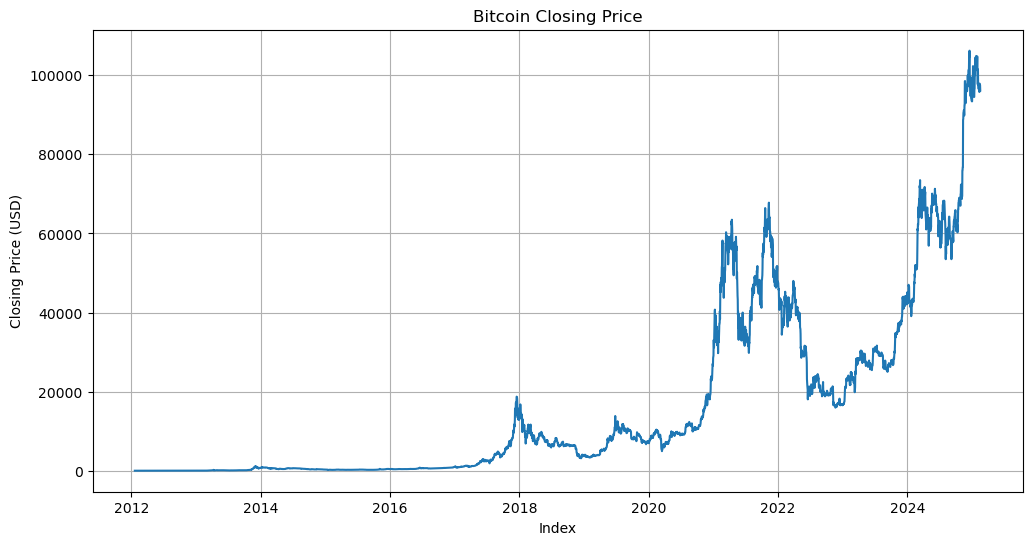

In [19]:
#closing price plot
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.xlabel('Index')
plt.ylabel('Closing Price (USD)')
plt.title('Bitcoin Closing Price')
plt.grid(True)
plt.show()

In [20]:
#(2) Your code and text goes here

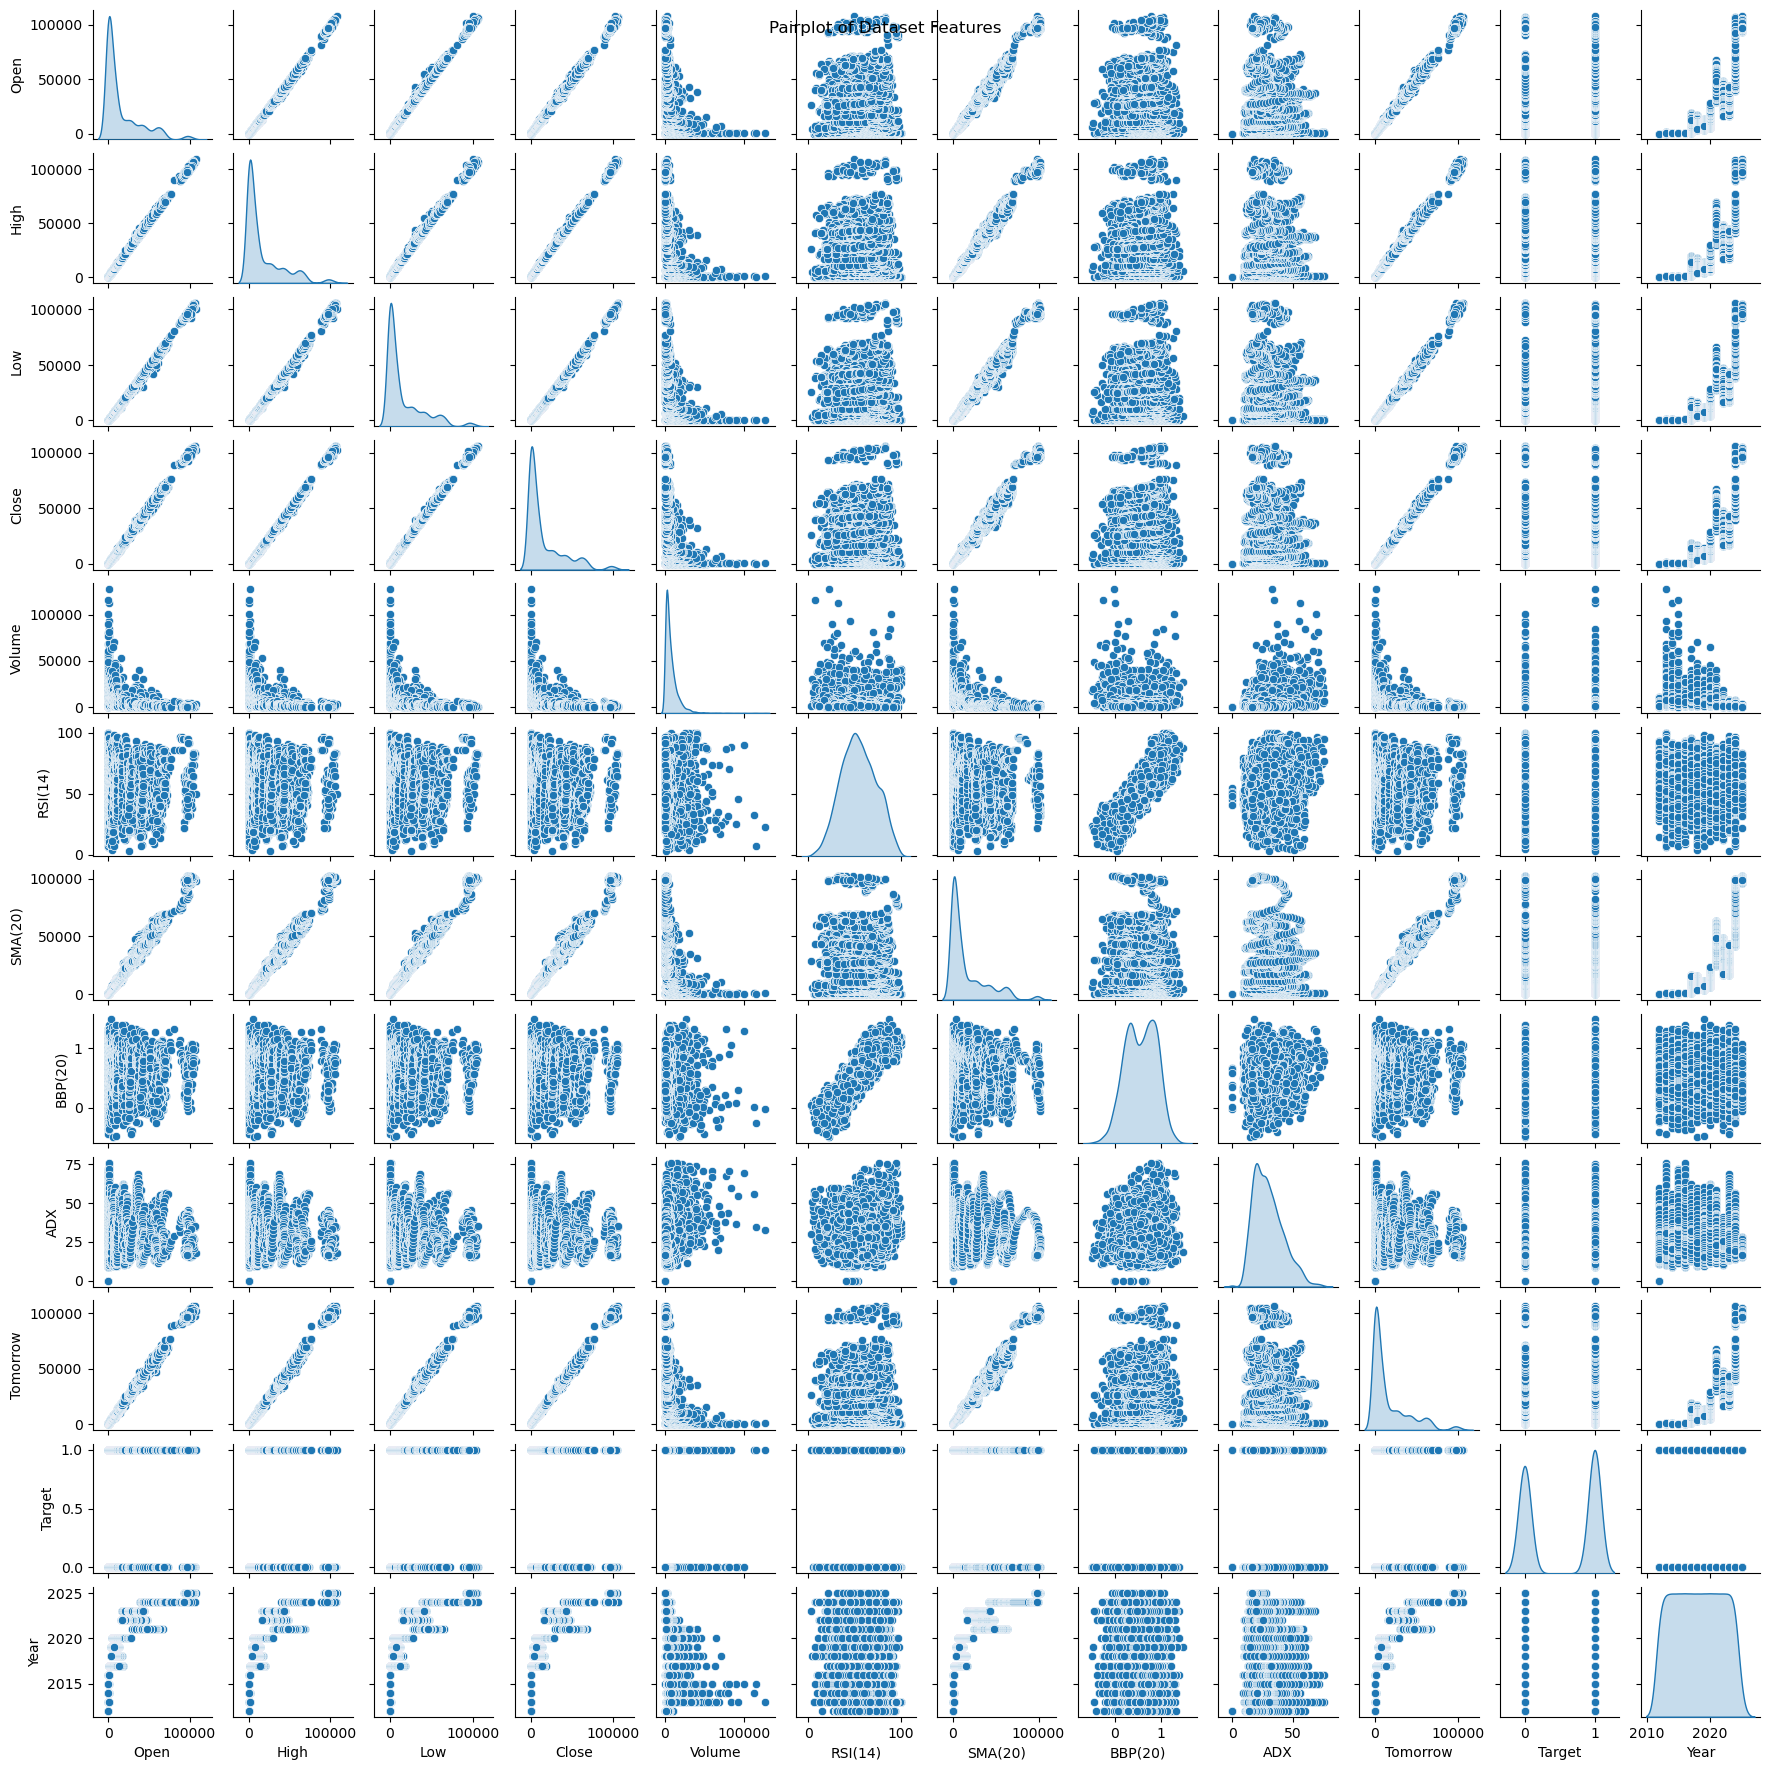

In [21]:
#Pairplot of Dataset Features
sns.pairplot(df, diag_kind='kde', height=1.5)
plt.suptitle("Pairplot of Dataset Features")
plt.show()

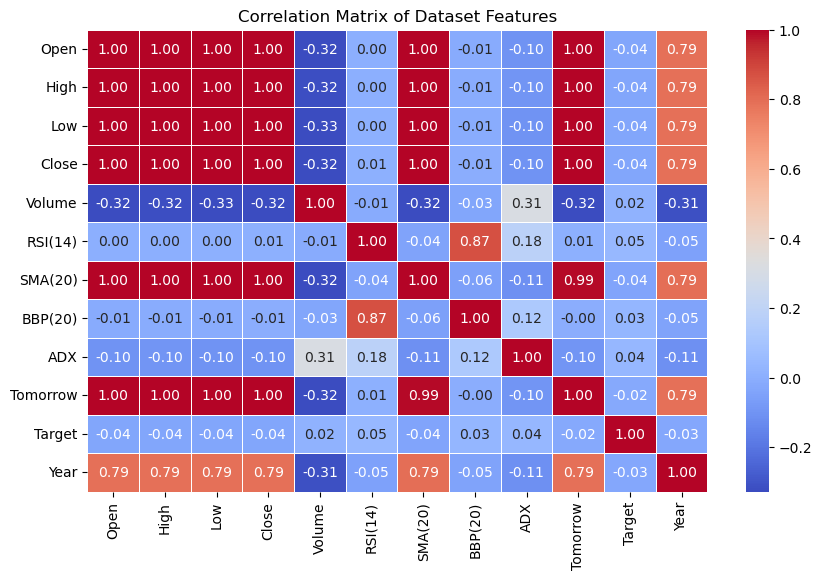

In [23]:
#Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Dataset Features")
plt.show()

SMA exhibits a strong positive correlation across different price ranges.

Apart from volume, the Average Directional Index (ADX) does not show a positive correlation with the other features. Furthermore, there is a negative relationship between volume and price.

BBP and RSI demonstrate a strong linear correlation with one another, but exhibit a negative relationship with price.

\pagebreak

# ========== Question 2.3 --- [7 marks] ==========

We here apply linear regression to predict 'Tomorrow' from 'ADX' (Average Directional Index). The ADX is a technical indicator that quantifies the strength of a price trend in assets from the Positive Directional Indicator (+DI) and Negative Directional Indicator (-DI). Its value is obtained by computing the ratio of the smoothed moving average of the absolute difference between +DI and -DI to the smoothed moving average of their sum.
For this question, you should use the sklearn implementation of Linear Regression. Use the first 80% of the data for training and the rest 20% for testing ***without shuffling***.
1. [Code] Fit a linear regression model to the training data so that we can predict 'Tomorrow' from 'ADX'. Report the estimated model parameters w and the coefficient of determination $R^2$.
2. [Text] Explain the significance of the model parameters 'w' (slope) and the intercept in the context of the linear regression model applied to your dataset. Also, discuss what the coefficient of determination, $R^2$, represents and its value obtained from the fitted model.
3. [Code] Report the root mean-square error (RMSE) for the training set and test set, respectively.
4. [Code] Plot predicted values versus actual values for the test set, where the x-axis corresponds to actual values and the y-axis to predicted values. Draw a line of $y=x$ on the plot.
5. [Code] Plot 'Tomorrow' versus 'ADX' for the training set and display the regression line on the same graph. The x-axis corresponds to 'ADX' and the y-axis to 'Tomorrow'.
6. [Text] Based on the $R^2$ and RMSE values for the test set, evaluate the predictability of the model. Discuss how well the model is able to forecast 'Tomorrow' values from 'ADX' and whether the performance on the test set suggests any limitations or strengths of the model.

\pagebreak
## Your answers for Question 2.3

In [24]:
#Model Features
X = df[['ADX']]
y = df['Tomorrow']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Model Fit
model = LinearRegression()
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Model parameters
w = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y_test, y_pred)

#Report
print(f"Model parameters: w = {w:.2f}, intercept = {intercept:.2f}")
print(f"Coefficient of determination (R²): {r2:.2f}")

Model parameters: w = -91.49, intercept = 12092.01
Coefficient of determination (R²): -1.98


The importance of the slope is to illustrate the correlation between changes in the Average Directional Index (ADX) and the predicted price for tomorrow.

The intercept represents the expected value of the predicted price when ADX is 0.

The presence of a negative coefficient of determination indicates that the model performed poorly and suggests that there may not be a significant relationship between the two variables. Therefore, the Average Directional Index (ADX) alone should not be used for making predictions.

In [25]:
# Predictions on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Computing RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

#Report
print(f"Root Mean Squared Error for training Set: {rmse_train:.2f}")
print(f"Root Mean Squared Error for test Set: {rmse_test:.2f}")

Root Mean Squared Error for training Set: 15228.17
Root Mean Squared Error for test Set: 43305.06


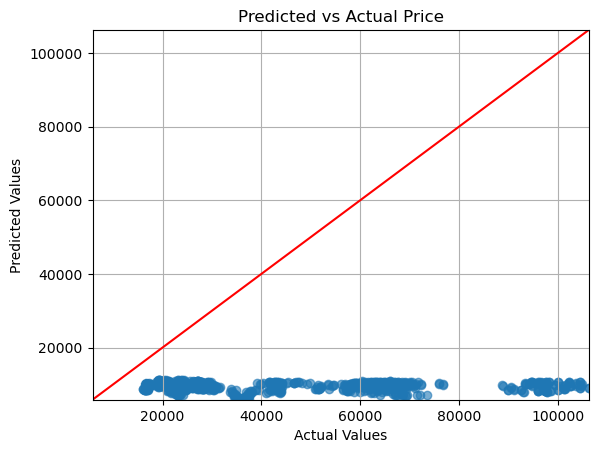

In [26]:
#Predicted vs Actual price plot
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Price')

#Axis limits 
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.xlim(lims)
plt.ylim(lims)

# Plotting the reference line y = x 
plt.plot(lims, lims, color='red')
plt.grid(True)
plt.show()

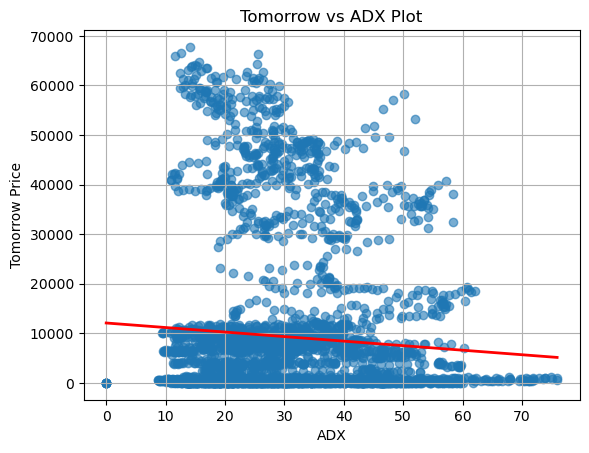

In [27]:
#Tomorrow vs ADX plot
plt.scatter(X_train, y_train, alpha=0.6)

# Regression line
x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_line = model.predict(x_range)
plt.plot(x_range, y_line, color='red', linewidth=2)

#Labels
plt.xlabel('ADX')
plt.ylabel('Tomorrow Price')
plt.title('Tomorrow vs ADX Plot')
plt.grid(True)
plt.show()

The presence of a negative coefficient of determination indicates that the model performed poorly and suggests that there is a negative linear relationship between the two variables.  

The RMSE value of 43,305.06 for the test set indicates that the model's performance is poor, as the predictions deviate significantly from the actual price.The two values affirms that ADX alone cannot be used as a prediction indicator for the next day bitcoin price.

\pagebreak

# ========== Question 2.4 --- [7 marks] ==========
#### Multiple linear regression and polynomial regression

We here consider multiple linear regression that employs four variables ('RSI', 'SMA', 'BBP', 'ADX') to predict 'Tomorrow'. We use the same training data and test data as Question 2.3.
1. [Code] Train the multiple linear regression model on the training set and show the model parameters and the coefficient of determination $R^2$. You also show the RMSE for the training set and test set respectively.
2. [Code] We now extend the model to the polynomial regression model, in which we use all polynomial combinations of the variables up to the specified degree $p$. Using $p=2$, run an experiment in the same manner as 1 above and report the model parameters and $R^2$. You also report the RMSE for the training and test sets respectively. You should use the sklearn implementation of Linear Regression and Polynomial Features.
3. [Text] Compare the results obtained from this multiple linear regression model with those from the single-variable linear regression model in Question 2.3. In your discussion, address the following points: (1) discuss any differences in performance between the multiple and single-variable models. (2) analyse whether there was an improvement in predictive accuracy with the addition of more variables. (3) consider the potential reasons behind the performance differences.

\pagebreak
## Your answers for Question 2.4

In [28]:
#Model Features
X = df[["RSI(14)","SMA(20)", "BBP(20)", 'ADX']]
y = df['Tomorrow']

#Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Model Fit
model = LinearRegression()
model.fit(X_train, y_train)

#Model Prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Model parameters
coefficients = model.coef_
intercept = model.intercept_

print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept:.2f}")
print()#white space

# Coefficient of Determination
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² for Training Set: {r2_train:.2f}")
print(f"R² for Test Set: {r2_test:.2f}")
print()#white space

# Calculating Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE for Training Set: {rmse_train:.2f}")
print(f"RMSE for Test Set: {rmse_test:.2f}")

Model Coefficients: [1.38687123e+01 1.00209267e+00 1.87987591e+03 2.01195101e+00]
Model Intercept: -1829.34

R² for Training Set: 0.99
R² for Test Set: 0.99

RMSE for Training Set: 1711.66
RMSE for Test Set: 2931.39


In [ ]:
#(2) Your code goes here

There is a significant difference in performance and accuracy between single-variable and multiple-variable regression.

The accuracy has improved from -1.98 in single-variable regression to 0.99 in multiple-variable regression. RMSE value for the single variable was 43,305.06, indicating a significant deviation from the actual Bitcoin prices. In contrast, the reduced RMSE score of 2,931.39 in the multiple variable regression demonstrates a much closer fit to the actual values.

These performance differences demonstrate that the Average Directional Index (ADX) alone had no significant impact on predicting the next day's price. However, when combined with additional variables, the model was able to make much more accurate predictions. This improvement is due to the strong positive influence of the added variables on forecasting tomorrow's price.

\pagebreak

# ========== Question 2.6 --- [20 marks] ==========

Now that you have a better understanding of implementing various classification models, let's focus on a mini-project using a simpler dataset. This exercise will help deepen your understanding of the entire classification process using SVM, KNN, and decision trees.

For this mini-project, proceed under the following guidelines:
- Use Mobile Price Classification dataset file ("mobile_price_data.csv") available at: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data. This dataset is designed to predict the **price_range** of mobile phones based on various technical specifications.
- Load the dataset in the following manner:
```bash
   df2 = pd.read_csv(data_path + "mobile_price_data.csv")
```
- Focus on SVM (SVC), K-nearest neighbor (KNN), and Decision tree models.
- Divide the dataset into two subsets without shuffling: use the first 80% for training and validation, and the remaining 20% for testing.
- Complete this project within a few hours.    

1. [Code and text] Load the dataset, standardise it, and use the **RandomForest** classifier (`n_estimators=100, random_state=0`) to determine and descibe feature importance with the `feature_importances_` attribute.
2.  [Code] Experiment with varying hyperparameters for three models: (1) **SVM**: Try different kernels: `['rbf', 'linear', 'poly', 'sigmoid']`. (2) **KNN**: Vary the number of neighbors: `np.arange(1, 101)`. (3) **Decision Tree**: Test different maximum depths: `np.arange(1, 30)`.
3.  [Code and Text] Visualise the performance across the different hyperparameters for these models and describe: (1) the best hyperparameter for each model.(2) summarize how different hyperparameters impact model performance.

\pagebreak    

##Your answers for Question 2.6

In [29]:
#Loading the data
data_path = "./dataset/"
df2 = pd.read_csv(data_path + "mobile_price_data.csv")

#Features and target
X = df2.drop(columns='price_range')
y = df2['price_range']

#Splitting & Standardizng the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initiating and fitting the model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_scaled,y_train)

#Making predictions
test_pred = model.predict(X_test_scaled)

#Feature importance
importances = model.feature_importances_

# Creating a DataFrameto structure the data for easier sorting.
importance_df = pd.DataFrame({'Feature': X.columns,'Importance': importances}).sort_values(by='Importance', ascending=False)

importance_df.head(5)

,Feature,Importance
13,ram,0.485874
0,battery_power,0.075544
11,px_height,0.056943
12,px_width,0.056004
8,mobile_wt,0.037902


The top five features with the highest impact on mobile prices include ram, battery power, pixel height & width and mobile weight. 
Even in the real world this are some of the key factors most people consider before buying a phone. 

In [30]:
#For code readability purposes, the model experimemntation will be done via individual cells.
#Will be reusing the data used by the random forest classifier

#Model initiation and fitting
model = SVC(random_state=0, kernel="linear")
model.fit(X_train_scaled,y_train)

#Model prediction 
predct = model.predict(X_test_scaled)

train_score = model.score(X_train_scaled,y_train)
test_score = model.score(X_test_scaled, y_test)

print(f'Train score {train_score}')
print(f'Test score {test_score}')

Train score 0.9775
Test score 0.97


In [31]:
#Model initiation and fitting
model = KNeighborsClassifier(n_neighbors=101)
model.fit(X_train_scaled,y_train)

#Model prediction 
predct = model.predict(X_test_scaled)

train_score = model.score(X_train_scaled,y_train)
test_score = model.score(X_test_scaled, y_test)

print(f'Train score {train_score}')
print(f'Test score {test_score}')

Train score 0.69625
Test score 0.6575


In [32]:
#Model initiation and fitting
model = DecisionTreeClassifier(max_depth=14, random_state=0)
model.fit(X_train_scaled,y_train)

#Model prediction 
predct = model.predict(X_test_scaled)

train_score = model.score(X_train_scaled,y_train)
test_score = model.score(X_test_scaled, y_test)

print(f'Train score {train_score}')
print(f'Test score {test_score}')

Train score 0.99875
Test score 0.8325


##### SVC accurracy based on different kernels. 
The linear kernel achieved the best accuracy for both training and testing.
rbf - Train score 0.983125, Test score 0.8925
linear - Train score 0.97, Test score 0.97
poly - Train score 0.97, Test score  0.78 
sigmoid - Train score 0.85, Test score 0.92
##### KNN
KNN has very closely realated accuracy scores for both train and test data.
There were no major differences in the training data scores with the lowest score being 0.68 and highest score being 0.70. However when 1 neighbour was applied the score increased to 1.
There were clear increaments for the training score with the increase of neigbours. The score increased from 0.51 with one neigbour to 0.65 when 101 neighbours were applied.
For KNN the higher the number of neighbours the better.
##### Decison Tree
Increasing the maximum depth led to an increase in accuracy for both the training and testing data.
15 appears to be the ideal Max depth.This is because there is no change in accuracy score for high numbers above 15 which indicate overfitting.